In [104]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [105]:
genres = pd.read_csv('/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/movies.csv')

### The dataset shape:

In [106]:
genres.shape

(40110, 3)

### The dataset head:

In [107]:
genres.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Tha dataset info:

In [108]:
genres.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40110 entries, 0 to 40109
Data columns (total 3 columns):
movieId    40110 non-null int64
title      40110 non-null object
genres     40110 non-null object
dtypes: int64(1), object(2)
memory usage: 940.1+ KB


### Creating new column indicating the year in which was movie produced:

In [109]:
def year (x):
    year = []
    x = x.split()
    for i in x:
        if '(' in i:
            year.append(i)
            new_year = []
            for v in year:
                v =  v.replace('(','') 
                v = v.replace(')','')
                new_year.append(v)
                for n in new_year:
                    try:
                        return float(n)
                    except:
                        return np.nan
    
    


genres['Year'] = genres['title'].map(year)

### Creating a new column where is a list containing words from the names and excluding year:

In [110]:
def remove (m):
    m = m.split()
    name = []
    for i in m:
        if '(' not in i:
            name.append(i)
    return name
            
genres['title_list'] = genres['title'].map(remove)

In [111]:
genres.head()

,movieId,title,genres,Year,title_list
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"[Toy, Story]"
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995.0,[Jumanji]
2,3,Grumpier Old Men (1995),Comedy|Romance,1995.0,"[Grumpier, Old, Men]"
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,"[Waiting, to, Exhale]"
4,5,Father of the Bride Part II (1995),Comedy,1995.0,"[Father, of, the, Bride, Part, II]"


### Creating new columns:
- comedy 
- drama
- documentary
- horror
- thriller
- western
- romance

In [112]:
genres['COMEDY'] = genres['genres'].map(lambda x: 1 if 'Comedy' in x else 0)
genres['DRAMA'] = genres['genres'].map(lambda x: 1 if 'Drama' in x else 0)
genres['DOCUMENTARY'] = genres['genres'].map(lambda x: 1 if 'Documentary' in x else 0)
genres['HORROR'] = genres['genres'].map(lambda x: 1 if 'Horror' in x else 0)
genres['THRILLER'] = genres['genres'].map(lambda x: 1 if 'Thriller' in x else 0)
genres['WESTERN'] = genres['genres'].map(lambda x: 1 if 'Western' in x else 0)
genres['ROMANCE'] = genres['genres'].map(lambda x: 1 if 'Romance' in x else 0)

### Removing missing data:

In [113]:
null = genres.isnull().sum()
null_sorted = null.sort_values(ascending=False, inplace=False)
print null_sorted


Year           5372
ROMANCE           0
WESTERN           0
THRILLER          0
HORROR            0
DOCUMENTARY       0
DRAMA             0
COMEDY            0
title_list        0
genres            0
title             0
movieId           0
dtype: int64


In [114]:
#Not removing any yet, will see if year is going to be necessary

In [115]:
sub_df = genres.sample(n=500)

### Plot for number of movies in each genre:

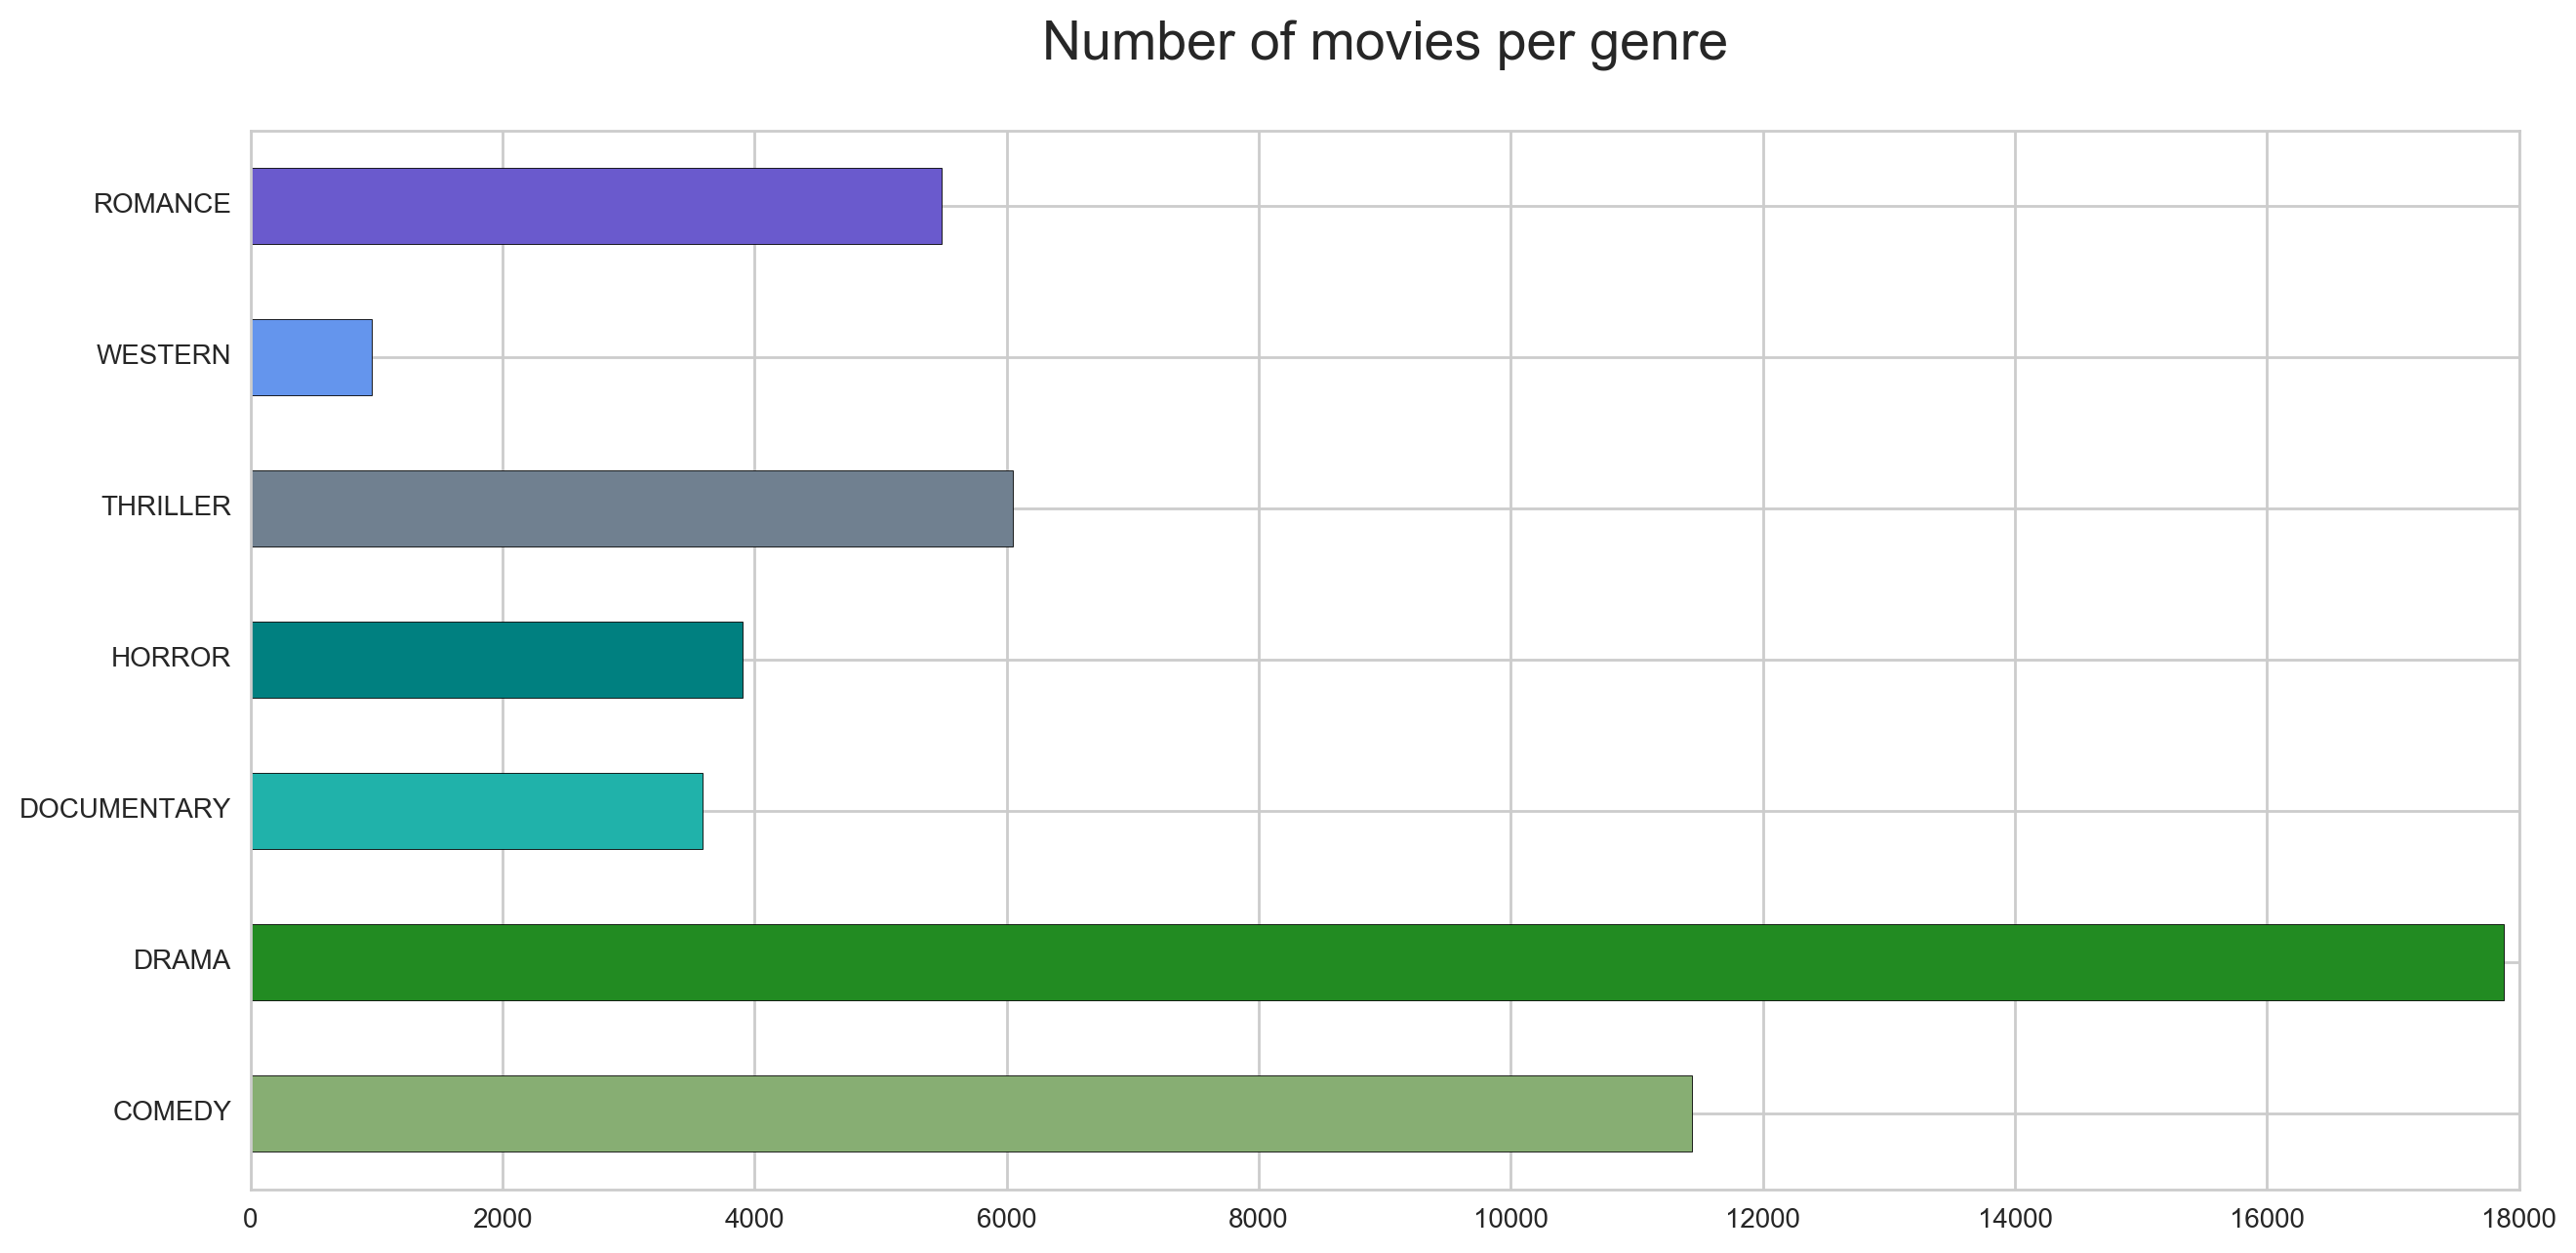

In [116]:
fig = plt.figure(figsize=(15,7))
ax = fig.gca()

# Plot the bars for each genre:
genres[['COMEDY', 'DRAMA', 'DOCUMENTARY', 'HORROR', 'THRILLER', 'WESTERN', 'ROMANCE']].sum().plot(kind='barh',
                                                                                                 color=('sage', 'forestgreen', 'lightseagreen','teal', 'slategrey', 'cornflowerblue', 'slateblue', 
                                                                                                                      'palevioletred'))
# put the title on
ax.set_title('Number of movies per genre\n', fontsize=20)

# change the x-ticks to be the states instead of the row indices
# this wasn't required, but is nice

plt.show()

### New dataframe to remove missing years:

In [117]:
year_df = genres

In [118]:
year_df.dropna(inplace=True)

### Mask to have only movie made in 1990 and up:

In [119]:
year = year_df[year_df['Year'] > 1900]

### Plot for number of movies per year:

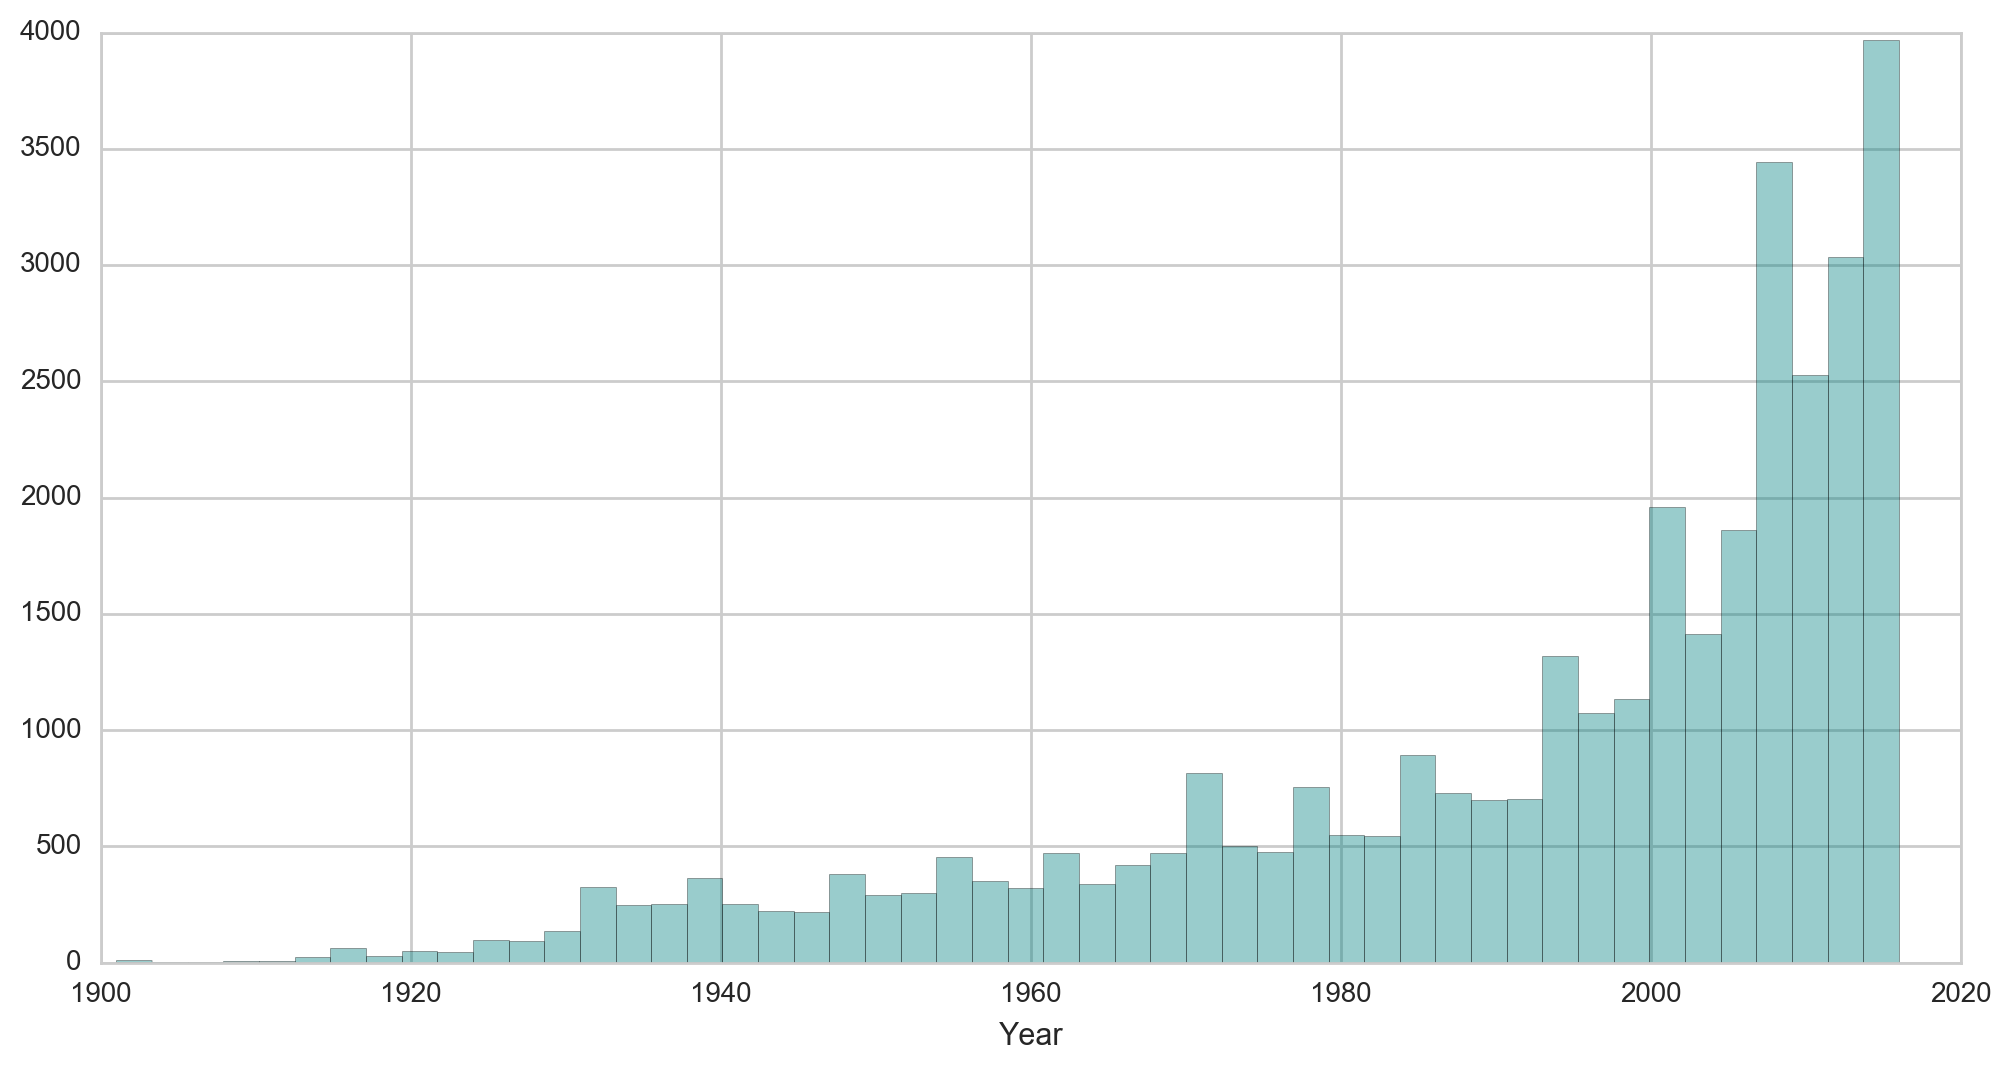

In [120]:

fig = plt.figure(figsize=(12,6))
ax = fig.gca()

ax = sns.distplot(year.Year, kde=False, color = 'teal')
plt.show()


### Loading new data set with ratings.

In [121]:
ratings = pd.read_csv("/Users/katerinacapouskova/Desktop/DSI-SF-4-katerinaC/Projects/Capstone/Movies/ml-latest/ratings.csv")

In [122]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24404096 entries, 0 to 24404095
Data columns (total 4 columns):
userId       int64
movieId      int64
rating       float64
timestamp    int64
dtypes: float64(1), int64(3)
memory usage: 744.8 MB


In [123]:
ratings.head(10)

,userId,movieId,rating,timestamp
0,1,122,2.0,945544824
1,1,172,1.0,945544871
2,1,1221,5.0,945544788
3,1,1441,4.0,945544871
4,1,1609,3.0,945544824
5,1,1961,3.0,945544871
6,1,1972,1.0,945544871
7,2,441,2.0,1008942733
8,2,494,2.0,1008942733
9,2,1193,4.0,1008942667


In [124]:
ratings.describe()

,userId,movieId,rating,timestamp
count,2.440410e+07,2.440410e+07,2.440410e+07,2.440410e+07
mean,1.293740e+05,1.353488e+04,3.526568e+00,1.149964e+09
std,7.496302e+04,2.754770e+04,1.064218e+00,1.941262e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,6.393000e+04,1.015000e+03,3.000000e+00,9.784169e+08
50%,1.294010e+05,2.424000e+03,3.500000e+00,1.131762e+09
75%,1.940370e+05,5.816000e+03,4.000000e+00,1.307577e+09
max,2.591370e+05,1.652010e+05,5.000000e+00,1.476688e+09


### Group ratings to get mean score for movies:

In [125]:
movieid_df = pd.DataFrame(ratings.groupby(['movieId'])['rating'].mean().reset_index())

### MovieID info:

In [126]:
movieid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39443 entries, 0 to 39442
Data columns (total 2 columns):
movieId    39443 non-null int64
rating     39443 non-null float64
dtypes: float64(1), int64(1)
memory usage: 616.4 KB


In [127]:
movieid_df.head()

,movieId,rating
0,1,3.889300
1,2,3.229527
2,3,3.178142
3,4,2.879433
4,5,3.080410


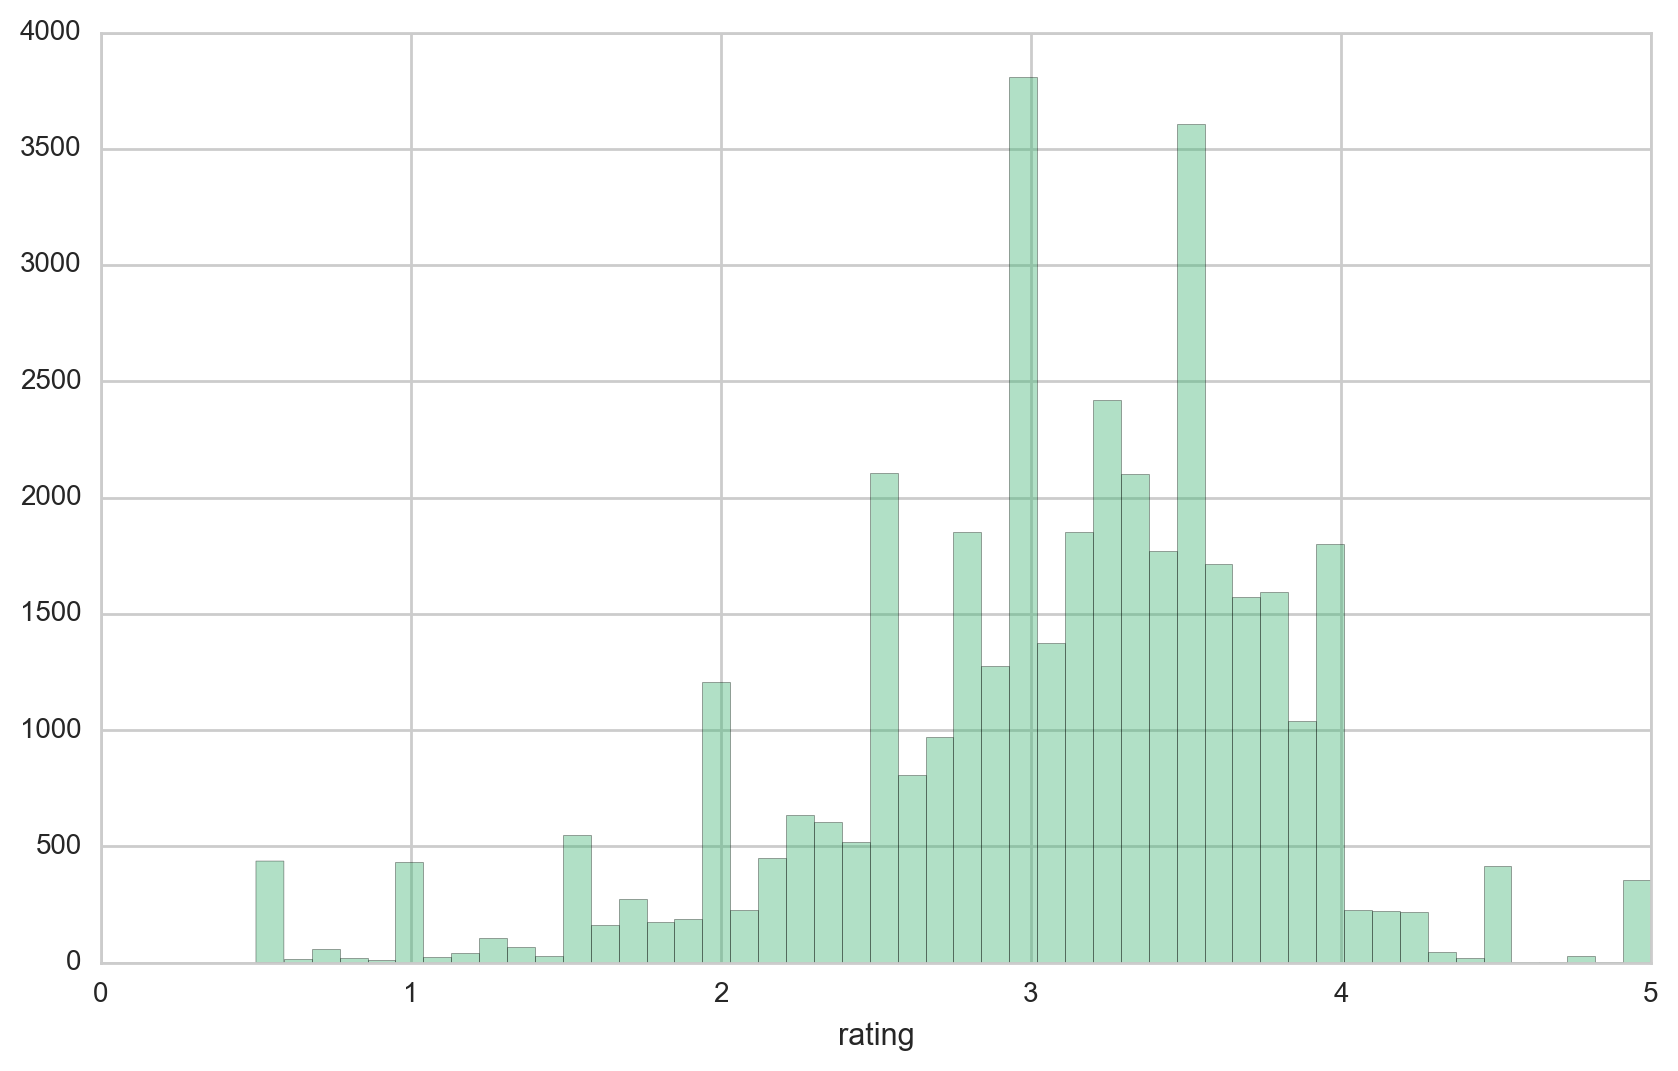

In [128]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()

ax = sns.distplot(movieid_df.rating, kde=False, color = 'mediumseagreen')
plt.show()


### Describe to see mean, median and std of mean ratings:

In [129]:
movieid_df.describe().T.tail(1)

,count,mean,std,min,25%,50%,75%,max
rating,39443.0,3.073327,0.736544,0.5,2.714286,3.166667,3.52381,5.0


#### Rename the ratings column to ratings_mean:

In [130]:
movieid_df['ratings_mean'] = movieid_df['rating']
del movieid_df['rating']

In [131]:
movieid_df.head()

,movieId,ratings_mean
0,1,3.889300
1,2,3.229527
2,3,3.178142
3,4,2.879433
4,5,3.080410


#### There are movies with mean ratings 5, lets look at them:

In [133]:
unique_movies = movieid_df[movieid_df['ratings_mean'] == 5.0]

#### There are 355 movies with mean rating 5. Might be that there is only one rating for each movie.

In [134]:
unique_movies.shape

(355, 2)

In [135]:
movie_ratings_count = pd.DataFrame(ratings.groupby(['movieId'])['rating'].count().reset_index())

In [136]:
movies_once_rated = movie_ratings_count[movie_ratings_count['rating'] == 1]
movies_once_rated.shape

(6870, 2)

#### There are 6870 once rated movies, so those with mean rating 5 are probably from this once rated category.

### Let's get rid of those movies that were rated only once so it is more 'objective'.

In [137]:
movies_ratings = movie_ratings_count[movie_ratings_count['rating'] != 1]

In [138]:
movies_ratings.shape

(32573, 2)

#### Rename the column to ratings_count:

In [139]:
movies_ratings['ratings_count'] = movies_ratings['rating']

/Applications/anaconda/envs/dsi/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [140]:
del movies_ratings['rating']

In [141]:
movies_ratings.head()

,movieId,ratings_count
0,1,63469
1,2,25045
2,3,15381
3,4,2961
4,5,15023


#### Let's merge the tables with ratings_count and ratings_mean together:

In [154]:
ratings_merged = movies_ratings.merge(movieid_df, how='left', left_on='movieId', right_on='movieId' )

In [156]:
ratings_merged.shape


(32573, 3)

## Looking at some individual users ratings:

In [142]:
users_df = pd.DataFrame(ratings.groupby(['userId'])['rating'].count().reset_index())

In [143]:
users_df.head()

,userId,rating
0,1,7
1,2,10
2,3,62
3,4,1
4,5,60


In [144]:
users_df.describe().T.tail(1)

,count,mean,std,min,25%,50%,75%,max
rating,259137.0,94.174495,198.89612,1.0,15.0,29.0,91.0,13250.0


In [145]:
users_df.rating.max()

13250

#### There is one unique user that has done 13250 ratings. Lets look at him.

In [146]:
unique_user = users_df[users_df['rating'] == 13250]

In [147]:
unique_user

,userId,rating
186589,186590,13250


In [148]:
mysterious_user = ratings[ratings['userId'] == 186589]

In [153]:
mysterious_user.head()

,userId,movieId,rating,timestamp
17564262,186589,1,5.0,938830168
17564263,186589,2,2.0,938832132
17564264,186589,4,2.0,938839981
17564265,186589,6,4.0,938831501
17564266,186589,7,2.0,938833538


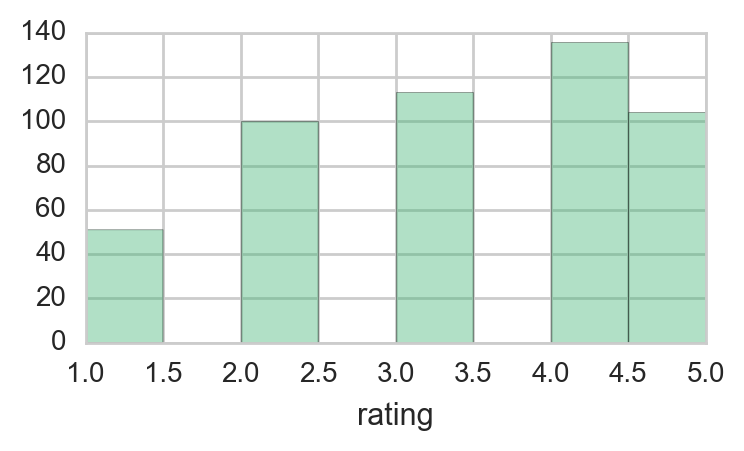

In [150]:
fig = plt.figure(figsize=(4,2))
ax = fig.gca()

ax = sns.distplot(mysterious_user.rating, kde=False, color = 'mediumseagreen')
plt.show()


## Merging ratings dataframe with movies dataframe:

In [159]:
movies = ratings_merged.merge(genres, how='left', left_on='movieId', right_on='movieId' )

In [160]:
movies.head()

,movieId,ratings_count,ratings_mean,title,genres,Year,title_list,COMEDY,DRAMA,DOCUMENTARY,HORROR,THRILLER,WESTERN,ROMANCE
0,1,63469,3.889300,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995.0,"[Toy, Story]",1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,25045,3.229527,Jumanji (1995),Adventure|Children|Fantasy,1995.0,[Jumanji],0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,15381,3.178142,Grumpier Old Men (1995),Comedy|Romance,1995.0,"[Grumpier, Old, Men]",1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,2961,2.879433,Waiting to Exhale (1995),Comedy|Drama|Romance,1995.0,"[Waiting, to, Exhale]",1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,5,15023,3.080410,Father of the Bride Part II (1995),Comedy,1995.0,"[Father, of, the, Bride, Part, II]",1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [172]:
movies.to_csv('movies_new.csv')

#### Plot to see the rating distribution for comedy, drama, and thriller.

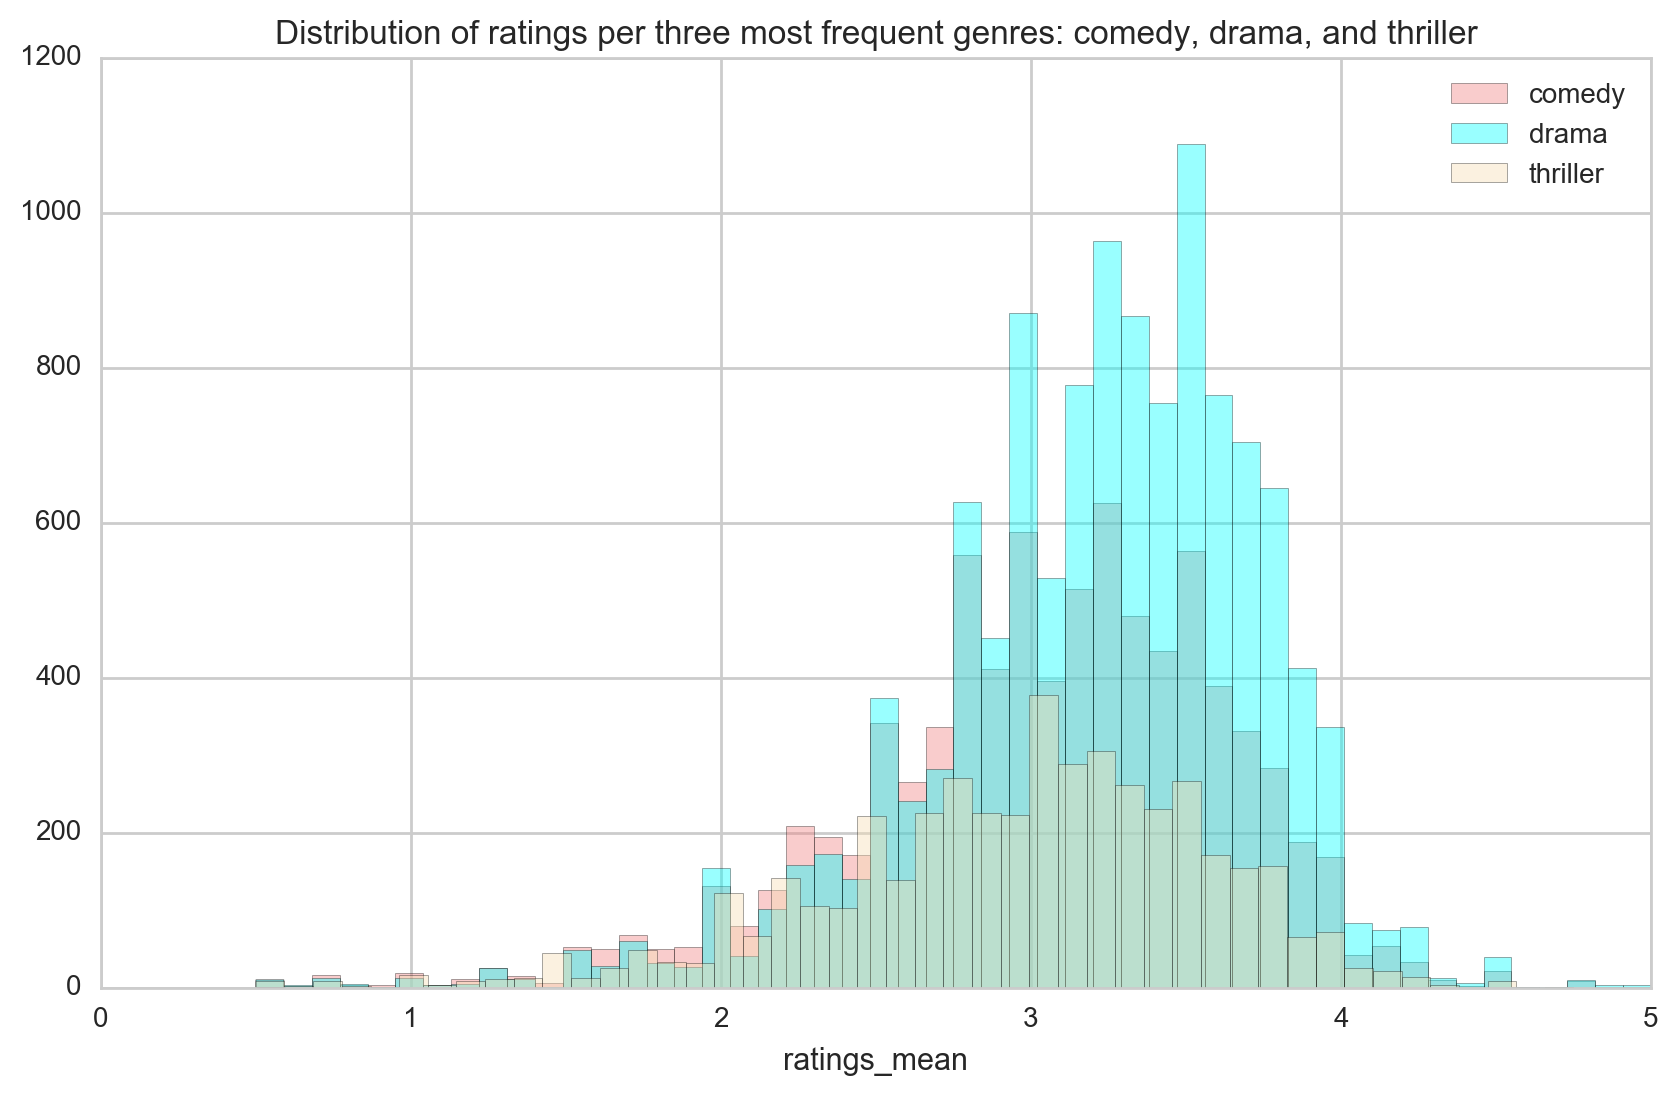

In [164]:
comedy_df = movies[movies['COMEDY'] == 1]
drama_df = movies[movies['DRAMA'] == 1]
thriller_df = movies[movies['THRILLER'] == 1]
documentary_df = movies[movies['DOCUMENTARY'] == 1]
romance_df = movies[movies['ROMANCE'] == 1]
horror_df = movies[movies['HORROR'] == 1]
western_df = movies[movies['WESTERN'] == 1]


fig = plt.figure(figsize=(10,6))
ax = fig.gca()

ax = sns.distplot(comedy_df.ratings_mean, kde=False, color = 'lightcoral', label='comedy')
ax = sns.distplot(drama_df.ratings_mean, kde=False, color = 'aqua', label='drama')
ax = sns.distplot(thriller_df.ratings_mean, kde=False, color = 'wheat', label='thriller')


ax.set_title('Distribution of ratings per three most frequent genres: comedy, drama, and thriller')

ax.legend(loc='upper right')


plt.show()


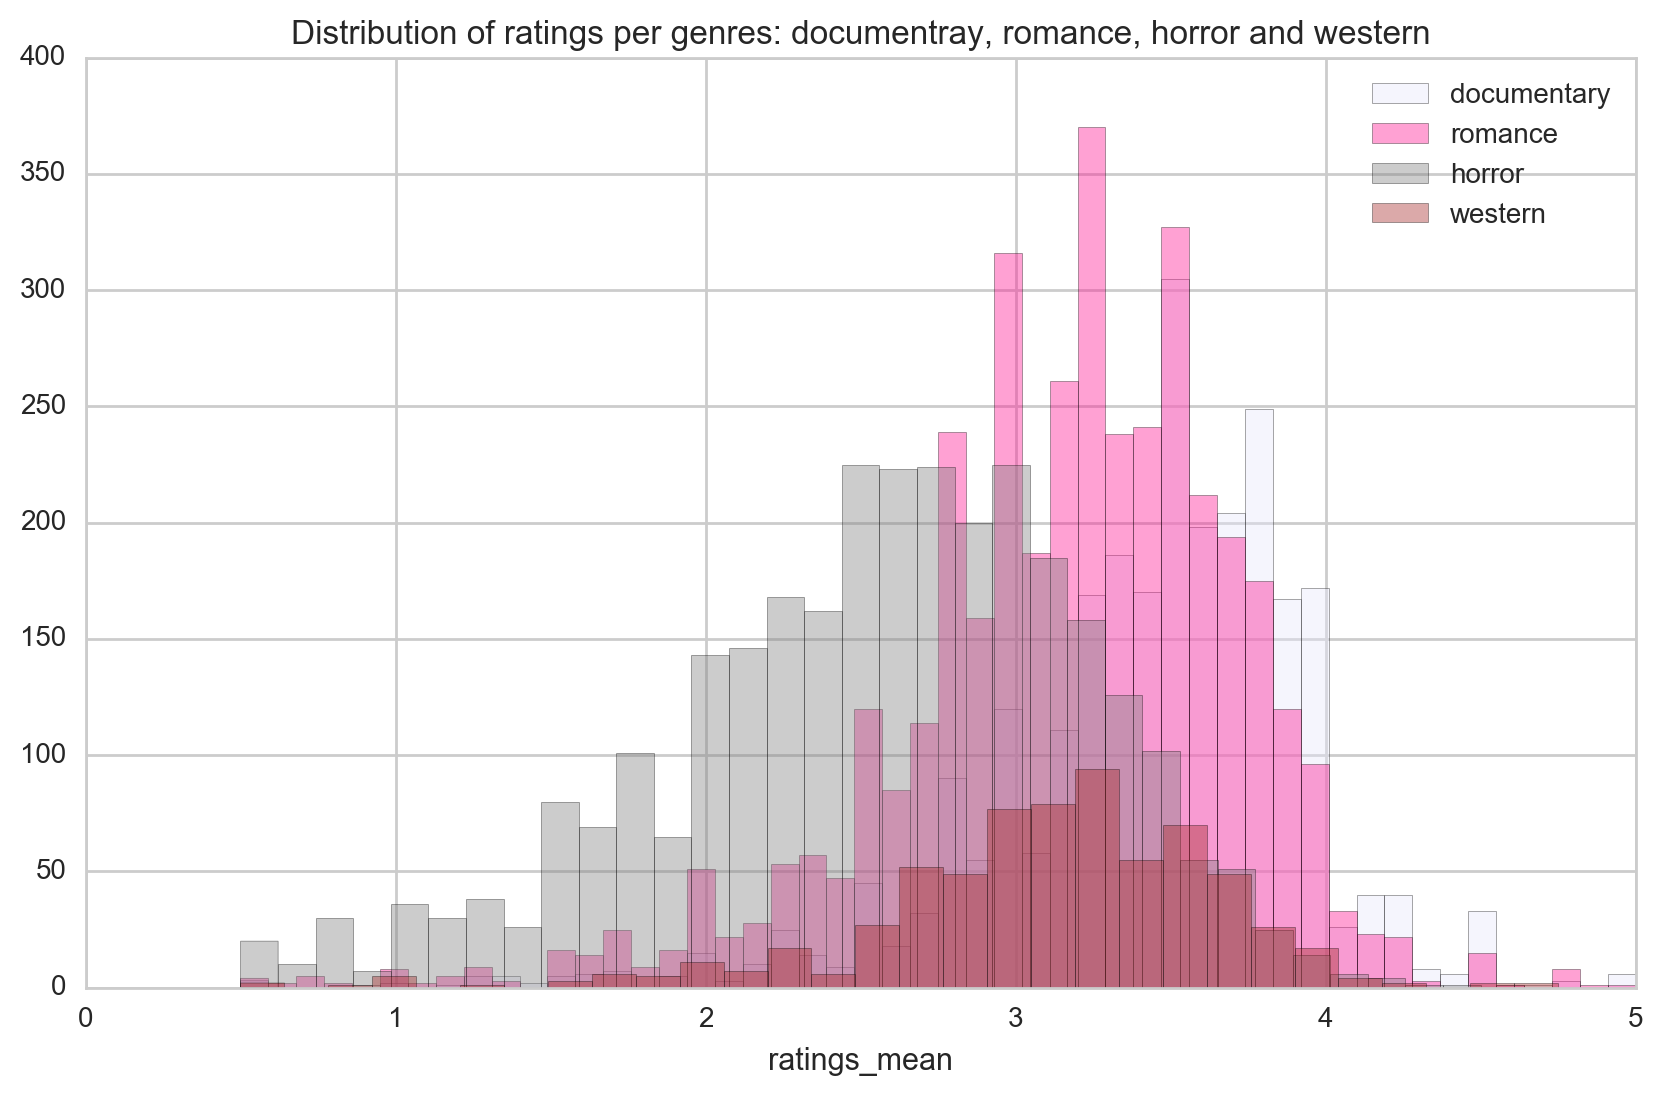

In [165]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()


ax = sns.distplot(documentary_df.ratings_mean, kde=False, color = 'lavender', label='documentary')
ax = sns.distplot(romance_df.ratings_mean, kde=False, color = 'deeppink', label='romance')
ax = sns.distplot(horror_df.ratings_mean, kde=False, color = 'grey', label='horror')
ax = sns.distplot(western_df.ratings_mean, kde=False, color = 'brown', label='western')


ax.set_title('Distribution of ratings per genres: documentray, romance, horror and western')

ax.legend(loc='upper right')


plt.show()


#### Looks like horror is doing the worst when it comes to ratings. 

In [166]:
horror_df.shape

(2956, 14)

In [167]:
documentary_df.shape

(2631, 14)

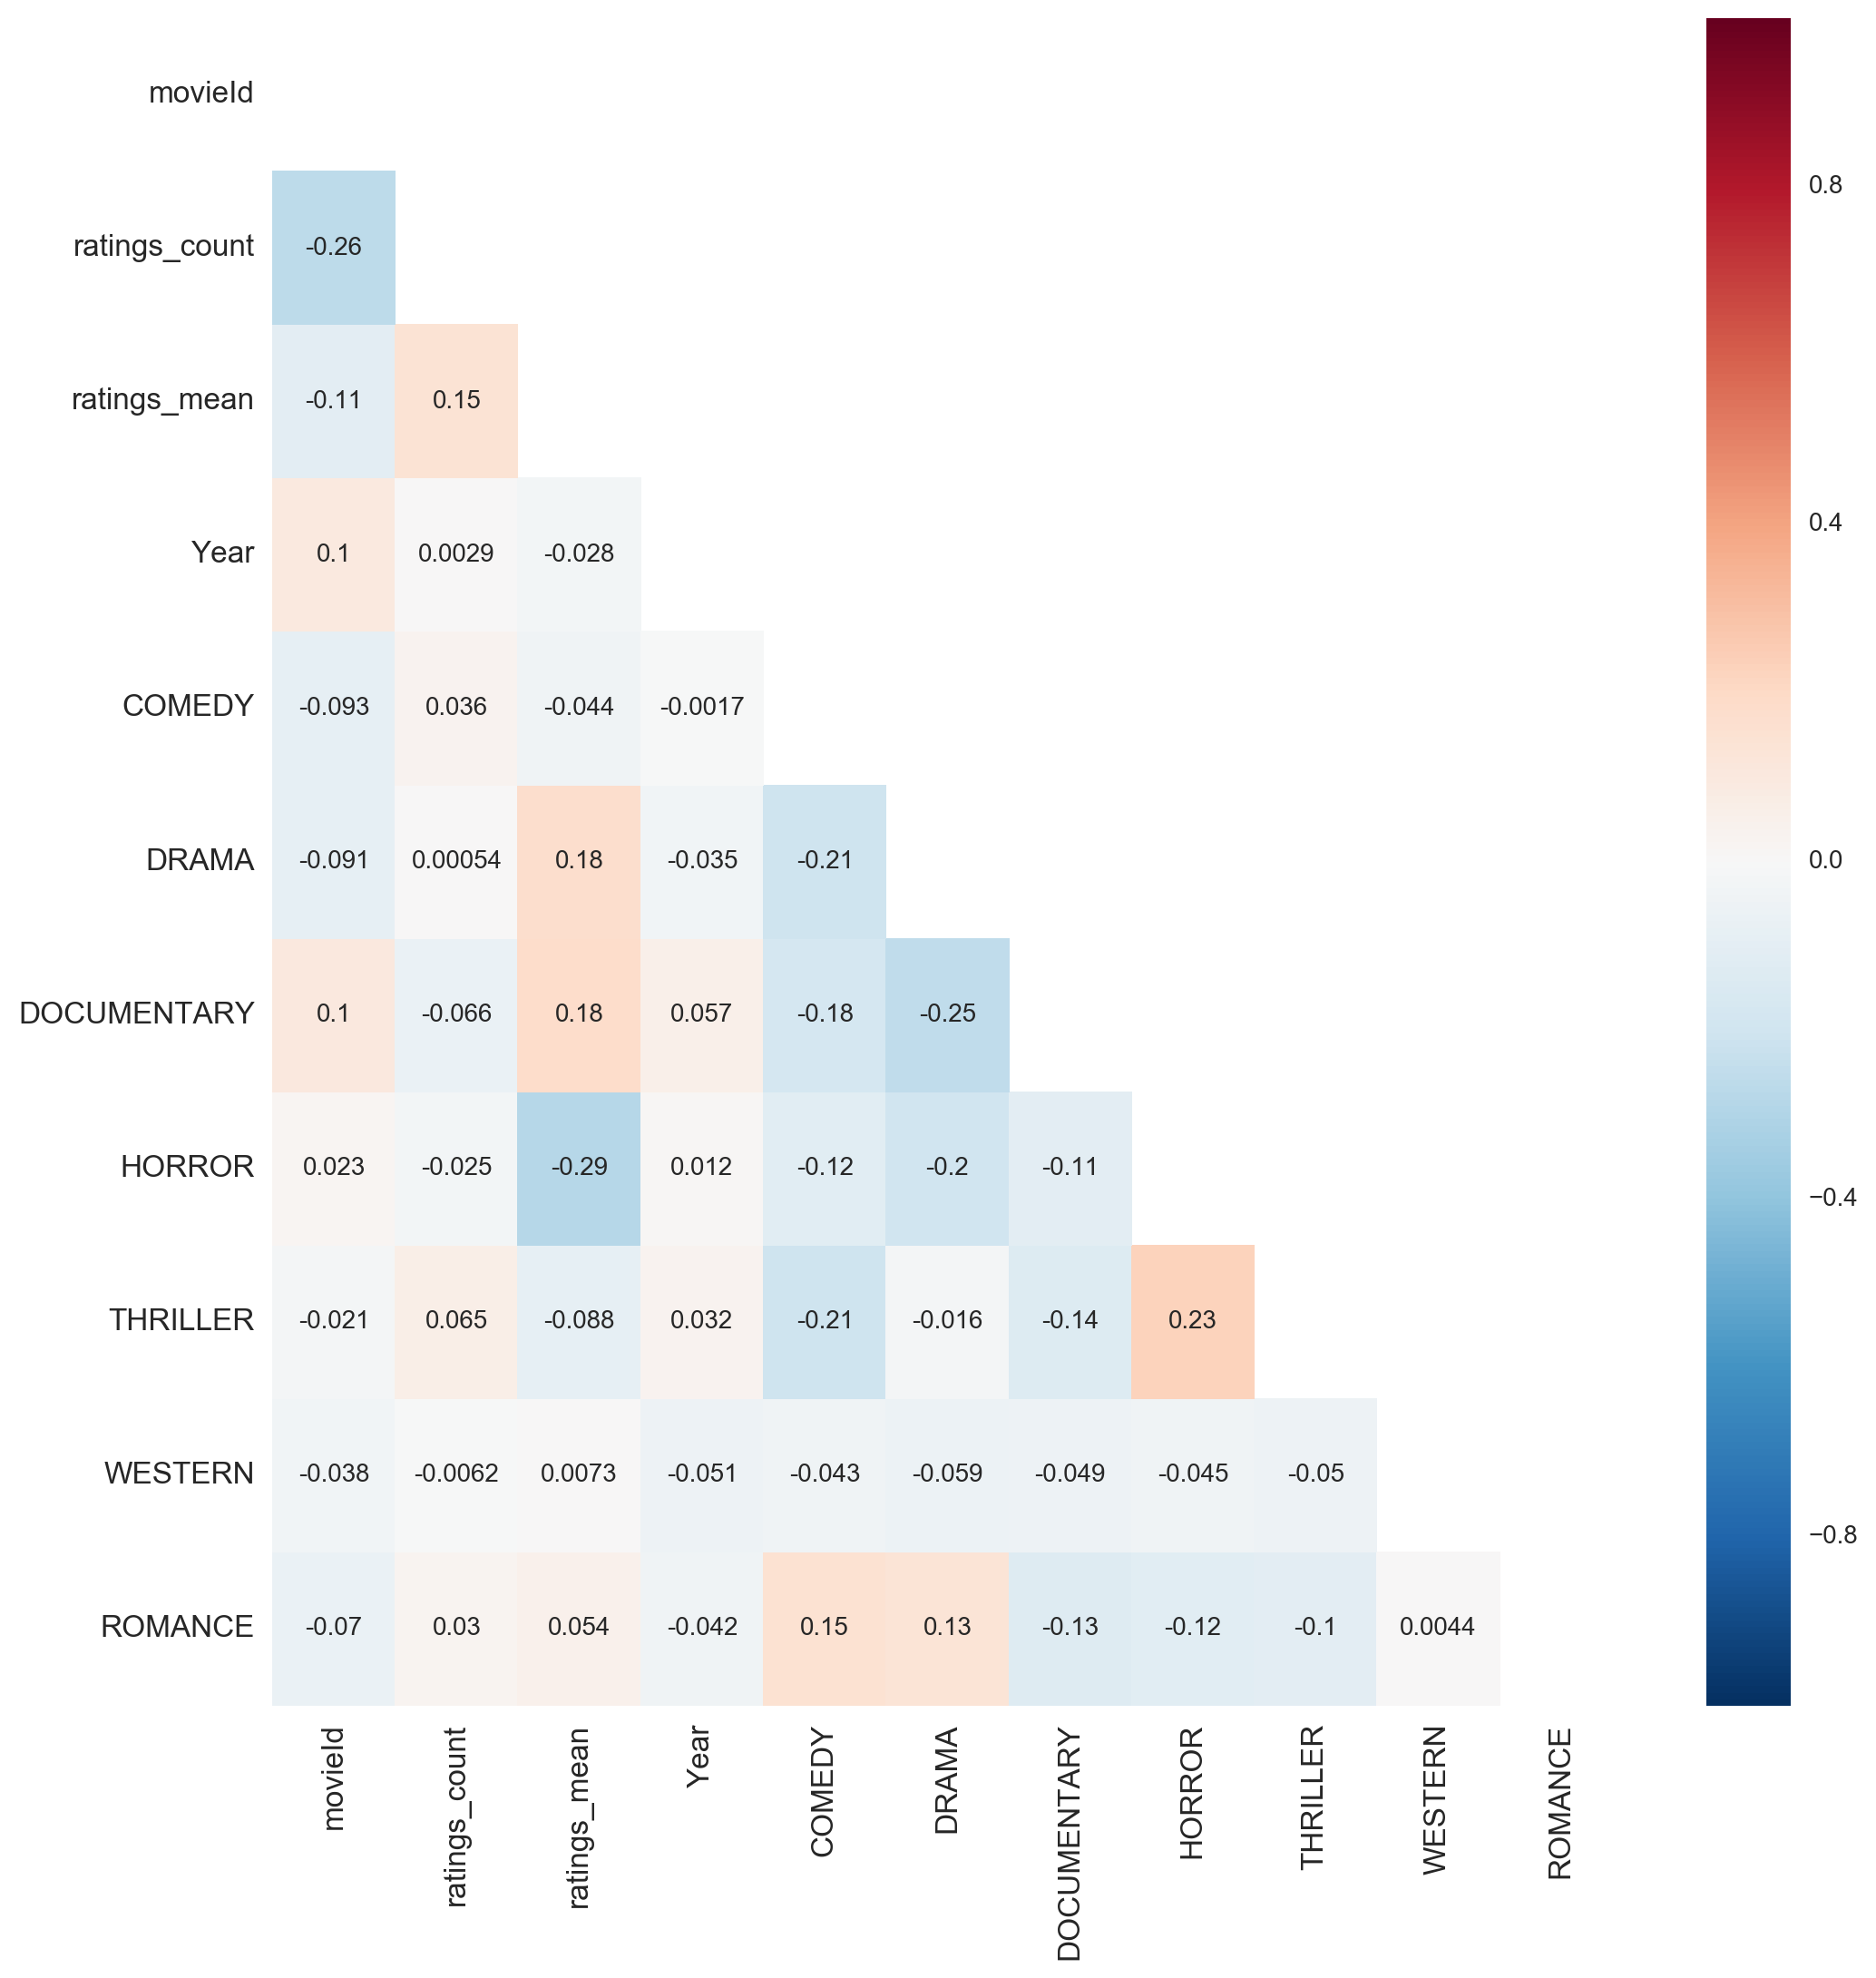

In [169]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(12,12))

    # Generate a mask for the upper triangle (taken from seaborn example gallery)
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with seaborn.
    # Assign the matplotlib axis the function returns. This will let us resize the labels.
    ax = sns.heatmap(corrs, mask=mask, annot=True)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12, rotation=90)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()
correlation_heat_map(movies)